<a href="https://colab.research.google.com/github/S1wol0423/data-medical/blob/main/03_intro_variants_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 활용 데이터 처리
## 데이터 불러오기
- EBI에서 제공하는 유전자 변이 데이터 다운로드
  - https://www.ebi.ac.uk/gwas/variants/rs7329174

- 구글 드라이브에 해당 파일 업로드(다운로드 파일 이름에서 날짜는 삭제)


In [45]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('/content/drive/MyDrive/2025-1/data.tsv', sep="\t", encoding = "utf-8")
df.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2013-02-21,23273568,Yang W,2012-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/23273568,Meta-analysis followed by replication identifi...,Systemic lupus erythematosus,"1,656 Han Chinese ancestry cases, 3,394 Han Ch...","3,256 Han Chinese ancestry cases, 5,667 Han Ch...",...,5.221849,NaN,1.45,NaN,Illumina [2100739] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST001795,Genome-wide genotyping array
1,2017-02-19,27399966,Morris DL,2016-07-11,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/27399966,Genome-wide association meta-analysis in Chine...,Systemic lupus erythematosus,"1,659 Chinese ancestry cases, 3,398 Chinese an...","3,043 Chinese ancestry cases, 5,074 Chinese an...",...,5.522879,(Chinese),1.27,[NR],NR [6344733] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST003622,Genome-wide genotyping array
2,2011-01-03,21044949,Yang J,2010-11-02,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/21044949,ELF1 is associated with systemic lupus erythem...,Systemic lupus erythematosus,"612 Chinese ancestry cases, 1,160 Chinese ance...","2,090 Chinese ancestry cases, 1,981 Chinese an...",...,8.000000,NaN,1.26,[1.16-1.36],Illumina [513108],N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST000858,Genome-wide genotyping array
3,2013-02-27,23266558,Yamazaki K,2012-12-21,Gastroenterology,www.ncbi.nlm.nih.gov/pubmed/23266558,A genome-wide association study identifies 2 s...,Crohn's disease,"372 Japanese ancestry cases,3,389 Japanese anc...","Up to 1,151 Japanese ancestry cases, up to 15,...",...,8.096910,NaN,1.27,[1.17-1.38],Illumina [4929034] (imputed),N,Crohn's disease,http://www.ebi.ac.uk/efo/EFO_0000384,GCST001785,Genome-wide genotyping array
4,2021-10-20,34076728,Zhang YM,2021-06-02,Mol Genet Genomics,www.ncbi.nlm.nih.gov/pubmed/34076728,Shared genetic study gives insights into the s...,Systemic lupus erythematosus,"1,639 East Asian ancestry cases, 2,410 East As...",NaN,...,5.522879,NaN,NaN,NaN,Illumina [NR] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST90020042,Genome-wide genotyping array


## 데이터프레임 전처리
- 결측값 처리
- 원핫인코딩

In [11]:
df.shape

(6, 38)

In [12]:
#데이터프레임 불러오기
df_fixed = df
df_fixed['P-VALUE (TEXT)'] = df_fixed['P-VALUE (TEXT)'].fillna('0')
# df_fixed['b'] = df_fixed['b'].fillna(df_fixed.mean()['a'])

df_fixed.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2013-02-21,23273568,Yang W,2012-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/23273568,Meta-analysis followed by replication identifi...,Systemic lupus erythematosus,"1,656 Han Chinese ancestry cases, 3,394 Han Ch...","3,256 Han Chinese ancestry cases, 5,667 Han Ch...",...,5.221849,0,1.45,NaN,Illumina [2100739] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST001795,Genome-wide genotyping array
1,2017-02-19,27399966,Morris DL,2016-07-11,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/27399966,Genome-wide association meta-analysis in Chine...,Systemic lupus erythematosus,"1,659 Chinese ancestry cases, 3,398 Chinese an...","3,043 Chinese ancestry cases, 5,074 Chinese an...",...,5.522879,(Chinese),1.27,[NR],NR [6344733] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST003622,Genome-wide genotyping array
2,2011-01-03,21044949,Yang J,2010-11-02,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/21044949,ELF1 is associated with systemic lupus erythem...,Systemic lupus erythematosus,"612 Chinese ancestry cases, 1,160 Chinese ance...","2,090 Chinese ancestry cases, 1,981 Chinese an...",...,8.000000,0,1.26,[1.16-1.36],Illumina [513108],N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST000858,Genome-wide genotyping array
3,2013-02-27,23266558,Yamazaki K,2012-12-21,Gastroenterology,www.ncbi.nlm.nih.gov/pubmed/23266558,A genome-wide association study identifies 2 s...,Crohn's disease,"372 Japanese ancestry cases,3,389 Japanese anc...","Up to 1,151 Japanese ancestry cases, up to 15,...",...,8.096910,0,1.27,[1.17-1.38],Illumina [4929034] (imputed),N,Crohn's disease,http://www.ebi.ac.uk/efo/EFO_0000384,GCST001785,Genome-wide genotyping array
4,2021-10-20,34076728,Zhang YM,2021-06-02,Mol Genet Genomics,www.ncbi.nlm.nih.gov/pubmed/34076728,Shared genetic study gives insights into the s...,Systemic lupus erythematosus,"1,639 East Asian ancestry cases, 2,410 East As...",NaN,...,5.522879,0,NaN,NaN,Illumina [NR] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST90020042,Genome-wide genotyping array


In [13]:
df_fixed2 = df
df_fixed2 = df_fixed2.fillna(0)
df_fixed2.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2013-02-21,23273568,Yang W,2012-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/23273568,Meta-analysis followed by replication identifi...,Systemic lupus erythematosus,"1,656 Han Chinese ancestry cases, 3,394 Han Ch...","3,256 Han Chinese ancestry cases, 5,667 Han Ch...",...,5.221849,0,1.45,0,Illumina [2100739] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST001795,Genome-wide genotyping array
1,2017-02-19,27399966,Morris DL,2016-07-11,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/27399966,Genome-wide association meta-analysis in Chine...,Systemic lupus erythematosus,"1,659 Chinese ancestry cases, 3,398 Chinese an...","3,043 Chinese ancestry cases, 5,074 Chinese an...",...,5.522879,(Chinese),1.27,[NR],NR [6344733] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST003622,Genome-wide genotyping array
2,2011-01-03,21044949,Yang J,2010-11-02,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/21044949,ELF1 is associated with systemic lupus erythem...,Systemic lupus erythematosus,"612 Chinese ancestry cases, 1,160 Chinese ance...","2,090 Chinese ancestry cases, 1,981 Chinese an...",...,8.000000,0,1.26,[1.16-1.36],Illumina [513108],N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST000858,Genome-wide genotyping array
3,2013-02-27,23266558,Yamazaki K,2012-12-21,Gastroenterology,www.ncbi.nlm.nih.gov/pubmed/23266558,A genome-wide association study identifies 2 s...,Crohn's disease,"372 Japanese ancestry cases,3,389 Japanese anc...","Up to 1,151 Japanese ancestry cases, up to 15,...",...,8.096910,0,1.27,[1.17-1.38],Illumina [4929034] (imputed),N,Crohn's disease,http://www.ebi.ac.uk/efo/EFO_0000384,GCST001785,Genome-wide genotyping array
4,2021-10-20,34076728,Zhang YM,2021-06-02,Mol Genet Genomics,www.ncbi.nlm.nih.gov/pubmed/34076728,Shared genetic study gives insights into the s...,Systemic lupus erythematosus,"1,639 East Asian ancestry cases, 2,410 East As...",0,...,5.522879,0,0.00,0,Illumina [NR] (imputed),N,systemic lupus erythematosus,http://purl.obolibrary.org/obo/MONDO_0007915,GCST90020042,Genome-wide genotyping array


In [14]:
df_fixed2['OR or BETA']

,OR or BETA
0,1.4500
1,1.2700
2,1.2600
3,1.2700
4,0.0000
5,0.0211


In [15]:
df_fixed2.rename(columns={'OR or BETA':'OR'}, inplace=True)
# df_fixed2['OR or BETA'] error!
df_fixed2['OR']

,OR
0,1.4500
1,1.2700
2,1.2600
3,1.2700
4,0.0000
5,0.0211


In [16]:
#df.columns
pvalue = df_fixed2['P-VALUE']
pvalue

,P-VALUE
0,6.000000e-06
1,3.000000e-06
2,1.000000e-08
3,8.000000e-09
4,3.000000e-06
5,8.000000e-26


In [17]:
df_fixed2['DISEASE/TRAIT']

,DISEASE/TRAIT
0,Systemic lupus erythematosus
1,Systemic lupus erythematosus
2,Systemic lupus erythematosus
3,Crohn's disease
4,Systemic lupus erythematosus
5,Height


In [18]:
trait = pd.get_dummies(df_fixed2['DISEASE/TRAIT'])
trait

,Crohn's disease,Height,Systemic lupus erythematosus
0,False,False,True
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True
5,False,True,False


In [19]:
trait = pd.get_dummies(df_fixed2['DISEASE/TRAIT'],dtype=int)
trait

,Crohn's disease,Height,Systemic lupus erythematosus
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


# Numpy 다차원 배열 변환

In [20]:
assoc = pd.concat([trait, pvalue, df_fixed2['OR']], axis=1) # 왼->오 방향
assoc

,Crohn's disease,Height,Systemic lupus erythematosus,P-VALUE,OR
0,0,0,1,6.000000e-06,1.4500
1,0,0,1,3.000000e-06,1.2700
2,0,0,1,1.000000e-08,1.2600
3,1,0,0,8.000000e-09,1.2700
4,0,0,1,3.000000e-06,0.0000
5,0,1,0,8.000000e-26,0.0211


In [21]:
import numpy as np
assoc_np = np.array(assoc)
assoc_np

array([[0.00e+00, 0.00e+00, 1.00e+00, 6.00e-06, 1.45e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.00e-06, 1.27e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.00e-08, 1.26e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 8.00e-09, 1.27e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.00e-06, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 8.00e-26, 2.11e-02]])

## Numpy broadcasting

In [22]:
assoc_np * 0 + 3

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [23]:
assoc_np_bc = assoc_np * 0 +3
assoc_np + assoc_np_bc

array([[3.        , 3.        , 4.        , 3.000006  , 4.45      ],
       [3.        , 3.        , 4.        , 3.000003  , 4.27      ],
       [3.        , 3.        , 4.        , 3.00000001, 4.26      ],
       [4.        , 3.        , 3.        , 3.00000001, 4.27      ],
       [3.        , 3.        , 4.        , 3.000003  , 3.        ],
       [3.        , 4.        , 3.        , 3.        , 3.0211    ]])

In [24]:
sample = [5, 5, 5, 5, 5]
sample_bc = assoc_np * 0 + 3
sample + sample_bc

array([[8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.]])

## List to Numpy Array

In [25]:
test = np.array([[1,2,3], [4,5,6]])
test

array([[1, 2, 3],
       [4, 5, 6]])

## Reshape

In [26]:
test4by4 = np.array(list(range(16))).reshape((4,4))
test4by4

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Fill 0 or 1

In [27]:
test = np.ones_like(test4by4)
test

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [28]:
test = np.ones(16)
test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
test = np.zeros((2,5))
test

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [30]:
test4by4[1,0]

np.int64(4)

## Slicing

In [31]:
test4by4[2]

array([ 8,  9, 10, 11])

In [32]:
test4by4[2,:]

array([ 8,  9, 10, 11])

In [33]:
test4by4[:,2]

array([ 2,  6, 10, 14])

In [34]:
test4by4[0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [35]:
test4by4[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
test4by4[test4by4[:,0]<5]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

## Mean

In [37]:
target = np.ones((10000,100))
target.shape

(10000, 100)

In [38]:
mean = target.mean(axis=1)
mean.shape

(10000,)

In [39]:
mean

array([1., 1., 1., ..., 1., 1., 1.])

# Image 배열

In [40]:
images = np.random.uniform(low=0, high=1, size=(1000, 400, 300, 3)) # 400x300 이미지 1000장
images.shape

(1000, 400, 300, 3)

In [41]:
img = images[0]
img.shape

(400, 300, 3)

In [42]:
img

array([[[0.74281633, 0.29410455, 0.21998418],
        [0.87226965, 0.58010715, 0.77200446],
        [0.4159138 , 0.26023105, 0.35964276],
        ...,
        [0.34410735, 0.50736656, 0.94474268],
        [0.52938165, 0.34322066, 0.46714692],
        [0.45214738, 0.59070804, 0.3496901 ]],

       [[0.88543138, 0.65621069, 0.9943221 ],
        [0.69107004, 0.78101235, 0.00757322],
        [0.70367299, 0.21497664, 0.49934631],
        ...,
        [0.54115641, 0.46460771, 0.96812465],
        [0.48523956, 0.06702797, 0.88735694],
        [0.97308287, 0.59520783, 0.91332669]],

       [[0.26094798, 0.27662651, 0.00602572],
        [0.75411225, 0.67547402, 0.47729018],
        [0.22419649, 0.37378102, 0.35797786],
        ...,
        [0.84673214, 0.45183505, 0.62479186],
        [0.28691778, 0.86826202, 0.77911214],
        [0.87442214, 0.94430735, 0.25198855]],

       ...,

       [[0.99074314, 0.56103232, 0.45957347],
        [0.22852048, 0.31556268, 0.0455869 ],
        [0.90851811, 0

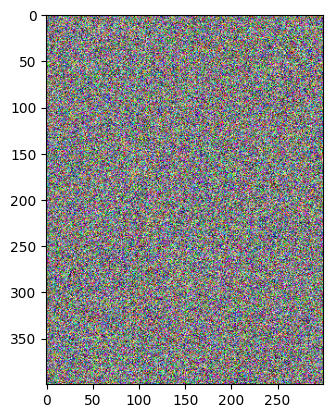

In [43]:
import matplotlib.pyplot as plt
plt.imshow(img)